In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import twitter
import time
import csv
## language processing libraries

import nltk
from nltk.text import Text
from nltk.tokenize import word_tokenize,TweetTokenizer,sent_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import unicodedata,re,string
from string import punctuation

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

In [2]:
data = pd.read_csv("data/full-corpus.csv")
data.head()

,Topic,Sentiment,TweetId,TweetDate,TweetText
0,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,Now all @Apple has to do is get swype on the i...
1,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,@Apple will be adding more carrier support to ...
2,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,Hilarious @youtube video - guy does a duet wit...
3,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,@RIM you made it too easy for me to switch to ...
4,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,I just realized that the reason I got into twi...


['positive' 'negative' 'neutral' 'irrelevant']


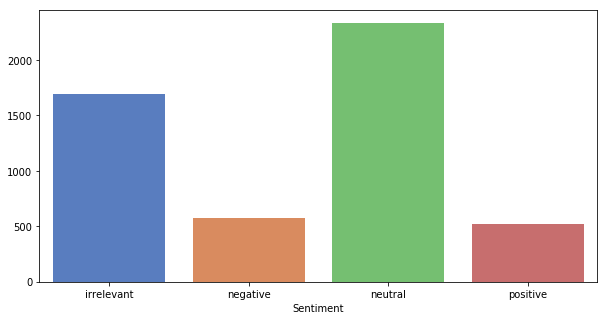

In [6]:
print(data["Sentiment"].unique())
x = data.groupby(["Sentiment"]).size()
plt.figure(figsize=(10,5))
sns.barplot(x.keys(),x.values,palette="muted")

In [10]:
leng = data["TweetText"].str.len()
print("Mean length of tweet : ",leng.mean())
print("Std of tweet : ",leng.std())
print("Max length of tweet : ",leng.max())

Mean length of tweet :  97.11480539800509
Std of tweet :  33.847598721445735
Max length of tweet :  160


[]

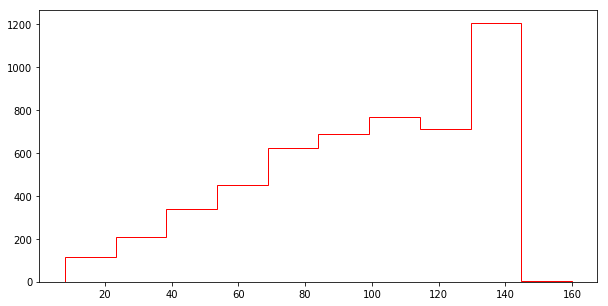

In [31]:
plt.figure(figsize=(10,5))
plt.hist(leng,histtype='step',color="R")
plt.plot()

In [ ]:
## RNN model will come here

In [7]:
cons_key = "__"
cons_sec = "__"
acc_key = "____"
acc_sec = "__"

# initialize api instance
twitter_api = twitter.Api(consumer_key=cons_key,
                        consumer_secret=cons_sec,
                        access_token_key=acc_key,
                        access_token_secret=acc_sec)

# test authentication
print(twitter_api.VerifyCredentials())

{"created_at": "Sat Oct 05 17:34:40 +0000 2019", "default_profile": true, "description": "Dev Account XD", "id": 1180536763346894849, "id_str": "1180536763346894849", "name": "99PercentBeast", "profile_background_color": "F5F8FA", "profile_image_url": "http://pbs.twimg.com/profile_images/1180536857290932224/SmY5M2ff_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1180536857290932224/SmY5M2ff_normal.jpg", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "beast_percent", "status": {"created_at": "Sun Oct 06 06:28:26 +0000 2019", "id": 1180731521549758465, "id_str": "1180731521549758465", "lang": "en", "source": "<a href=\"https://epic-sentiment-analysis.com\" rel=\"nofollow\">epic-sentiment-analysis</a>", "text": "This is post update on twitter"}, "statuses_count": 1}


In [8]:
def buildTestSet(search_keyword):
    try:
        tweets_fetched = twitter_api.GetSearch(search_keyword, count = 100)
        
        print("Fetched " + str(len(tweets_fetched)) + " tweets for the term " + search_keyword)
        
        return [{"text":status.text, "label":None} for status in tweets_fetched]
    except:
        print("Unfortunately, something went wrong..")
        return None

search_term = input("Enter a search keyword:")
testDataSet = buildTestSet(search_term)

print(testDataSet[0:4])

Enter a search keyword: blizzard


Fetched 100 tweets for the term blizzard
[{'text': 'in tonight\'s Collegiate Hearthstone championship, American University held up a "Free Hong Kong, boycott Blizzard"… https://t.co/PCvOADd8O3', 'label': None}, {'text': 'This hurts. But until Blizzard reverses their decision on @blitzchungHS I am giving up playing Classic WoW, which I… https://t.co/lbiIHUHxUK', 'label': None}, {'text': 'Not everyone at Blizzard agrees with what happened.\n\nBoth the "Think Globally" and "Every Voice Matters" values hav… https://t.co/gsncVbPnqM', 'label': None}, {'text': "RT @blakersdozen: Scoop: Blizzard employees walked out of work yesterday over the company's decision to ban a pro-Hong-Kong professional He…", 'label': None}]
